# Linear Regression - Project Exercise

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

## Imports

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the Data

In [67]:
cust = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [68]:
cust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis
Use seaborn to compare mobile app experience and website experience to decide whether to focus on mobile app or website.

In [82]:
sns.set_palette("GnBu_d")

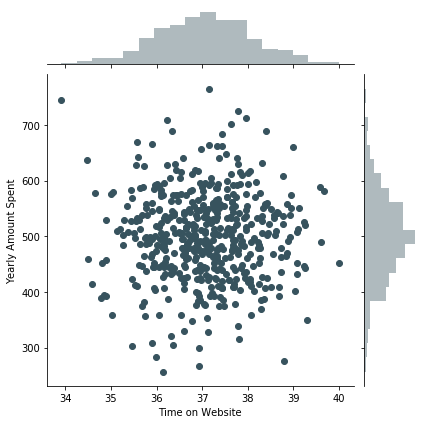

In [83]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cust)

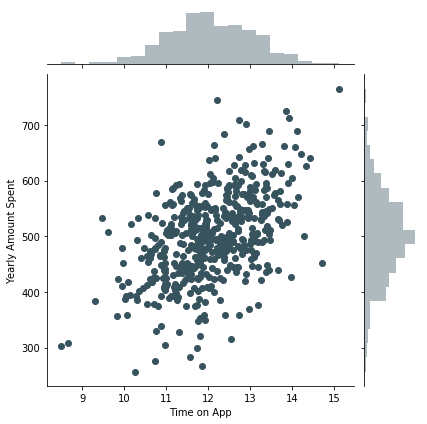

In [84]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cust)

**To check relationships across the entire data set, create pairplot.**


**It is plotting-pairwise-relationships-with-pairgrid-and-pairplot.**

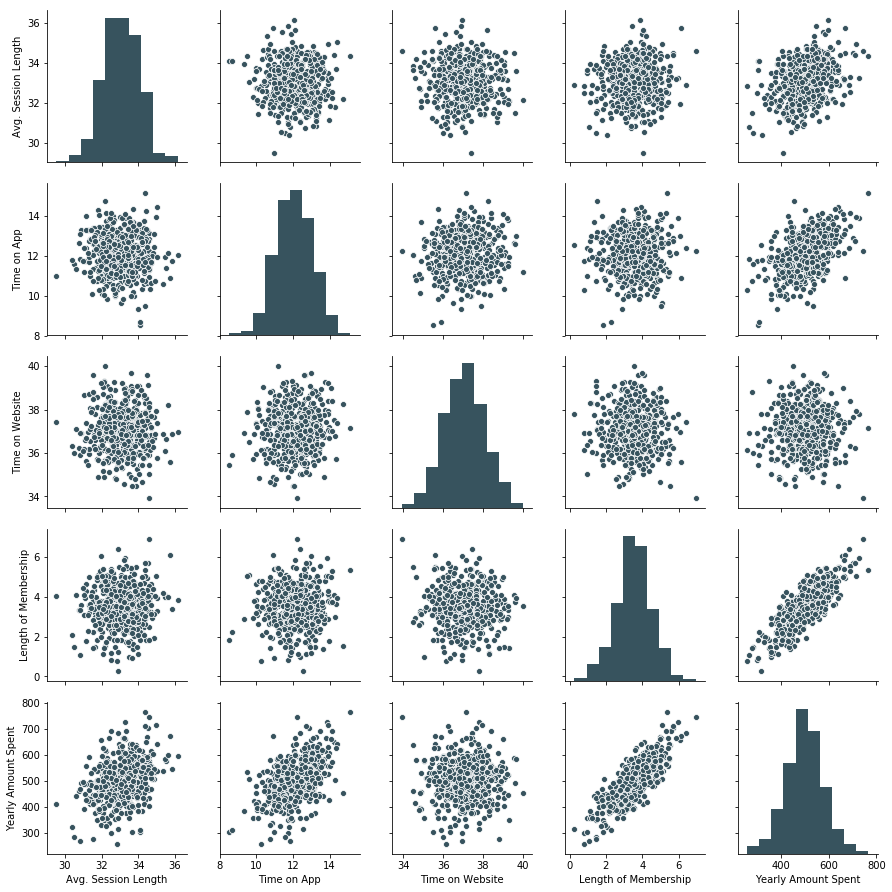

In [85]:
sns.pairplot(cust)

**From this plot Yearly Amount Spent looks to be the most correlated feature with Yearly Amount Spent**

In [ ]:
# Length of Membership 

**Creating a linear model(using seaborn's lmplot) to plot Yearly Amount Spent vs. Length of Membership.**

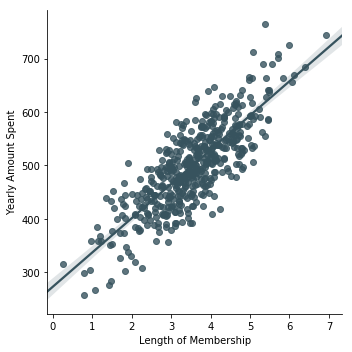

In [89]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

In [91]:
x=cust[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [92]:
y=cust['Yearly Amount Spent']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [95]:
X_train.shape

(350, 4)

In [96]:
X_test.shape

(150, 4)

## Training the Model

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.57321405 38.62159203  0.66645253 61.63438972]


## Predicting Test Data

In [110]:
ypred=lr.predict(X_test)

In [111]:
ypred

array([558.41867947, 518.60719542, 551.6792212 , 597.47011288,
       670.92324163, 601.08912787, 526.91345106, 524.1474619 ,
       486.71344521, 533.79637848, 584.55436874, 305.53639241,
       564.9779673 , 355.56543577, 568.90671506, 511.80185563,
       495.93559854, 471.5514714 , 461.99667744, 474.48234842,
       487.2523164 , 553.05362117, 407.08719151, 473.6813766 ,
       518.65123121, 523.11725138, 481.53458643, 558.06147869,
       598.3579527 , 505.75490605, 390.20341156, 331.64880615,
       542.60758414, 565.62031459, 482.51841049, 417.31598718,
       575.03901463, 437.89400663, 424.8805781 , 398.82948444,
       506.99358353, 460.15443937, 548.21784064, 403.59723592,
       508.3241745 , 472.3275344 , 538.43613827, 512.79247208,
       522.61905526, 483.43124273, 569.78880857, 432.70290617,
       478.75105595, 558.73850038, 398.25224971, 451.80946325,
       414.87257417, 384.32027771, 515.21115505, 287.5763261 ,
       426.84229515, 589.05771024, 553.98318502, 610.69

In [112]:
(y_test-ypred).head()

7      -8.514533
340   -17.484704
302    -9.707017
298    -9.895313
172    -4.797650
Name: Yearly Amount Spent, dtype: float64

Text(0, 0.5, 'Predicted Y')

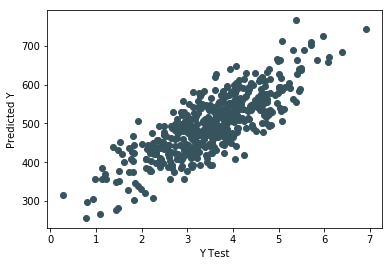

In [116]:
plt.scatter(x='Length of Membership',y='Yearly Amount Spent',data=cust)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model Evaluation

In [120]:
from sklearn import metrics

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 7.93508772285264
MSE: 99.50792624159173
RMSE: 9.975365970308644


## Plot distplot

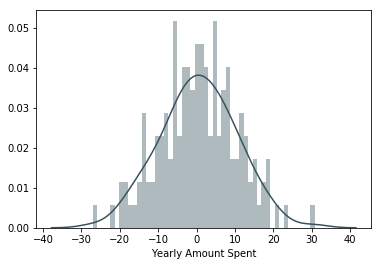

In [131]:
sns.distplot((y_test-ypred),bins=50)

As plotting looks perfect i.e. normally distributed

In [153]:
pd.DataFrame(lr.coef_,x.columns)
#pd.DataFrame(lr.coef_,x.columns)

,0
Avg. Session Length,25.573214
Time on App,38.621592
Time on Website,0.666453
Length of Membership,61.634390


To find out which gives beter performance need to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!